In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [7]:
df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

In [8]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [10]:
df.rename(columns={'chest pain':'chest_pain','resting bp s':'resting_bp_s','fasting blood sugar':'fasting_blood_sugar','resting ecg':'resting_ecg','max heart rate':'max_heart_rate','exercise angina':'exercise_angina','ST slope':'ST_slope'})

,age,sex,chest pain type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [11]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [12]:
df.shape

(1190, 12)

In [13]:
df.size

14280

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [15]:
df.sample(3)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
754,56,1,4,125,249,1,2,144,1,1.2,2,1
799,41,1,4,110,172,0,2,158,0,0.0,1,1
363,56,1,3,155,0,0,1,99,0,0.0,2,1


<Axes: >

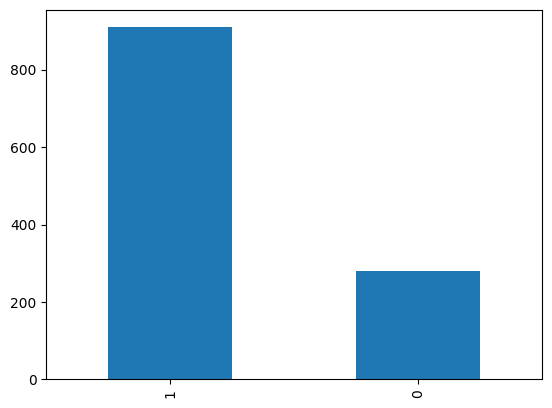

In [16]:
df['sex'].value_counts().plot(kind='bar')

In [17]:
df['age'].value_counts()

54    67
58    58
57    50
52    47
55    47
59    47
56    47
51    47
62    46
60    44
53    40
48    38
61    38
63    37
41    33
50    32
64    31
43    31
46    31
44    29
65    29
49    27
42    26
45    25
67    23
47    23
66    19
39    18
38    17
69    16
40    16
35    14
37    13
68    13
70    11
34     9
74     8
71     8
36     6
32     5
72     4
29     4
77     3
75     3
76     3
33     2
31     2
30     1
28     1
73     1
Name: age, dtype: int64

In [18]:
df['chest pain type'].value_counts()

4    625
3    283
2    216
1     66
Name: chest pain type, dtype: int64

In [19]:
df['cholesterol'].value_counts()

0      172
254     16
234     13
211     13
204     13
      ... 
385      1
466      1
129      1
338      1
131      1
Name: cholesterol, Length: 222, dtype: int64

In [20]:
df[(df['age'] > 50) & (df['target']==1)][['age','target']].head()

,age,target
11,58,1
18,60,1
30,53,1
32,54,1
36,65,1


**NULL VALUES**

In [21]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [22]:
mean_val=df['resting bp s'].mean()
df['resting bp s'].fillna(value=mean_val,inplace=True)

In [23]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [24]:
df.iloc[700][:]

age                     41.0
sex                      1.0
chest pain type          3.0
resting bp s           130.0
cholesterol            214.0
fasting blood sugar      0.0
resting ecg              2.0
max heart rate         168.0
exercise angina          0.0
oldpeak                  2.0
ST slope                 2.0
target                   0.0
Name: 700, dtype: float64

**SCALING**

150    49
140    46
120    39
130    36
160    35
       ..
78      1
67      1
63      1
70      1
83      1
Name: max heart rate, Length: 119, dtype: int64


<Axes: >

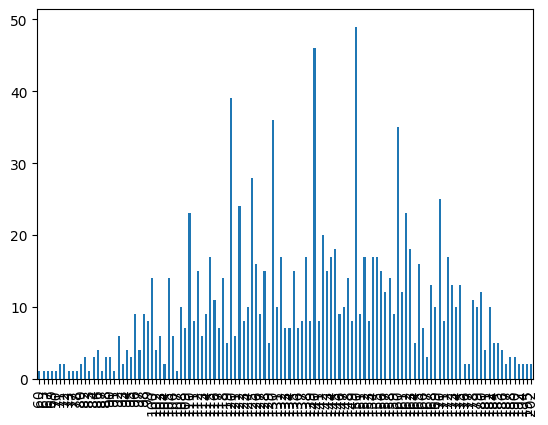

In [25]:
print(df['max heart rate'].value_counts())
df['max heart rate'].value_counts().sort_index().plot.bar()

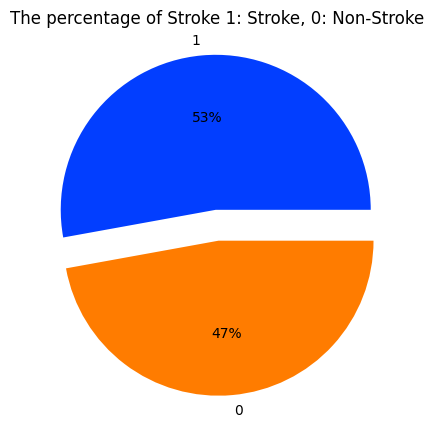

In [26]:
data = df["target"].value_counts()
labels = df["target"].value_counts().index

fig = plt.figure(figsize =(5, 7))
palette_color = sns.color_palette('bright')
plt.pie(data, labels=labels, colors=palette_color, autopct='%.0f%%', explode=[0.1, 0.1])

plt.title("The percentage of Stroke 1: Stroke, 0: Non-Stroke");


In [27]:
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['target'],axis=1)
y=df['target']
X_over, y_over = oversample.fit_resample(X, y)

## **Rubrics 2: HANDLING DATA**

0    629
1    629
Name: target, dtype: int64


<Axes: >

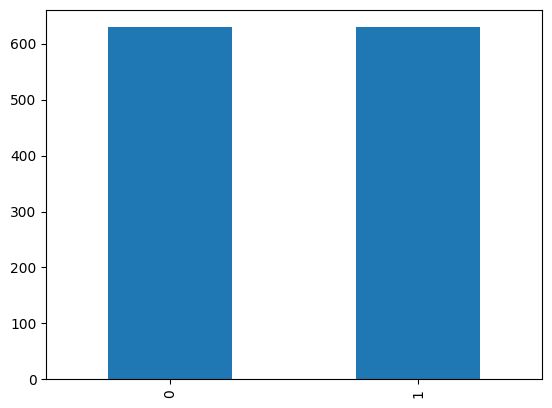

In [28]:
print(y_over.value_counts())
y_over.value_counts().sort_index().plot.bar()

**OUTLIER REMOVAL**

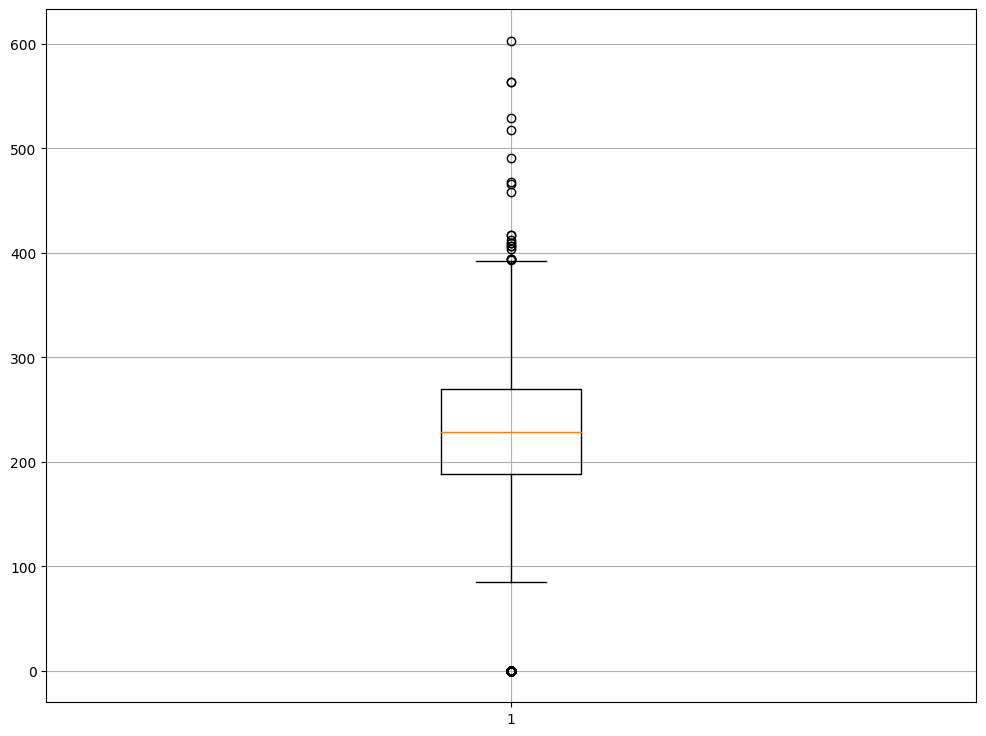

In [29]:
plt.rcParams['figure.figsize']=(12.0,9.0)
x=df.iloc[:]['cholesterol'].values
plt.boxplot(x)
plt.grid()
plt.show()

In [30]:
percentile25 = df['cholesterol'].quantile(0.25)
percentile75 = df['cholesterol'].quantile(0.75)

In [31]:
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("The upper limit is",upper_limit)
print("The lower limit is",lower_limit)

The upper limit is 392.375
The lower limit is 65.375


In [32]:
a=df[df['cholesterol'] > upper_limit]
b=df[df['cholesterol'] < lower_limit]
print(a)

      age  sex  chest pain type  resting bp s  cholesterol  \
28     53    0                2           113          468   
30     53    1                3           145          518   
69     44    1                4           150          412   
76     32    1                4           118          529   
103    40    1                4           120          466   
123    58    0                2           180          393   
149    54    1                4           130          603   
183    52    1                4           140          404   
251    44    1                4           135          491   
257    55    0                2           130          394   
497    58    1                4           132          458   
618    67    0                3           115          564   
626    63    0                4           150          407   
669    65    0                3           140          417   
798    56    0                4           134          409   
805    6

In [33]:
new_df = df.copy()
new_df['cholesterol'] = np.where(
    new_df['cholesterol'] > upper_limit,
    upper_limit,
    np.where(
        new_df['cholesterol'] < lower_limit,
        lower_limit,
        new_df['cholesterol'])
)

<ipython-input-34-f0acb36233e3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cholesterol'])
<ipython-input-34-f0acb36233e3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['cholesterol'])


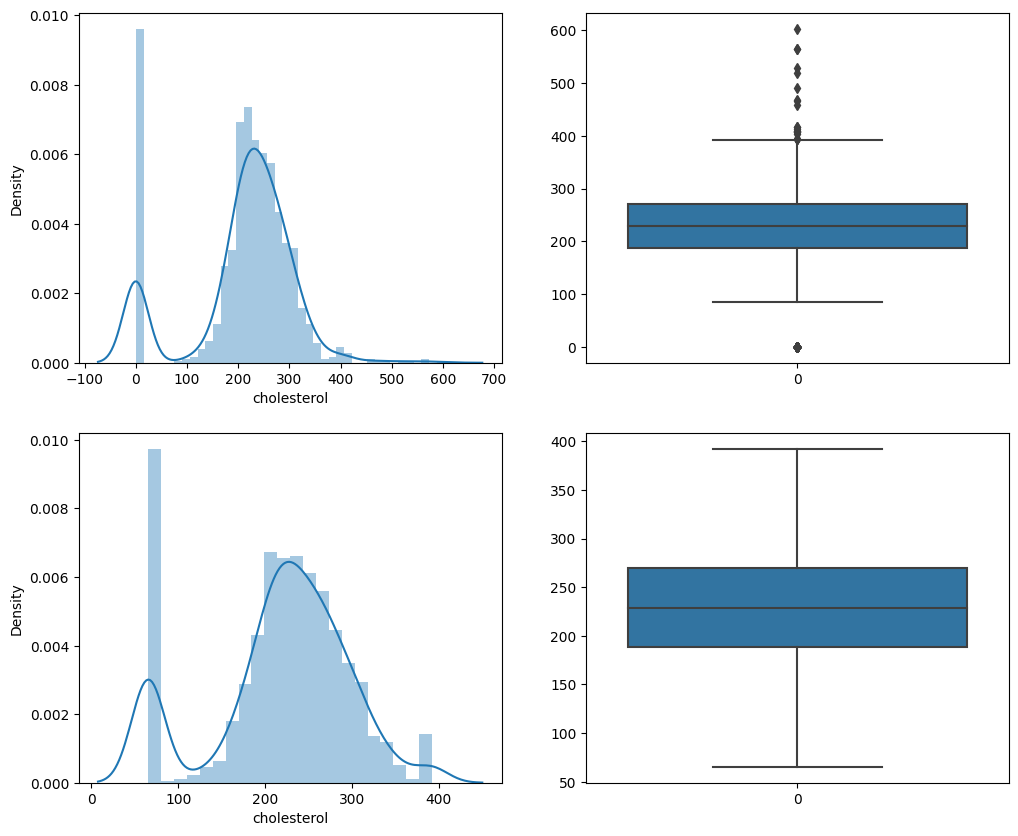

In [34]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.distplot(df['cholesterol'])
plt.subplot(2,2,2)
sns.boxplot(df['cholesterol'])
plt.subplot(2,2,3)
sns.distplot(new_df['cholesterol'])
plt.subplot(2,2,4)
sns.boxplot(new_df['cholesterol'])
plt.show()

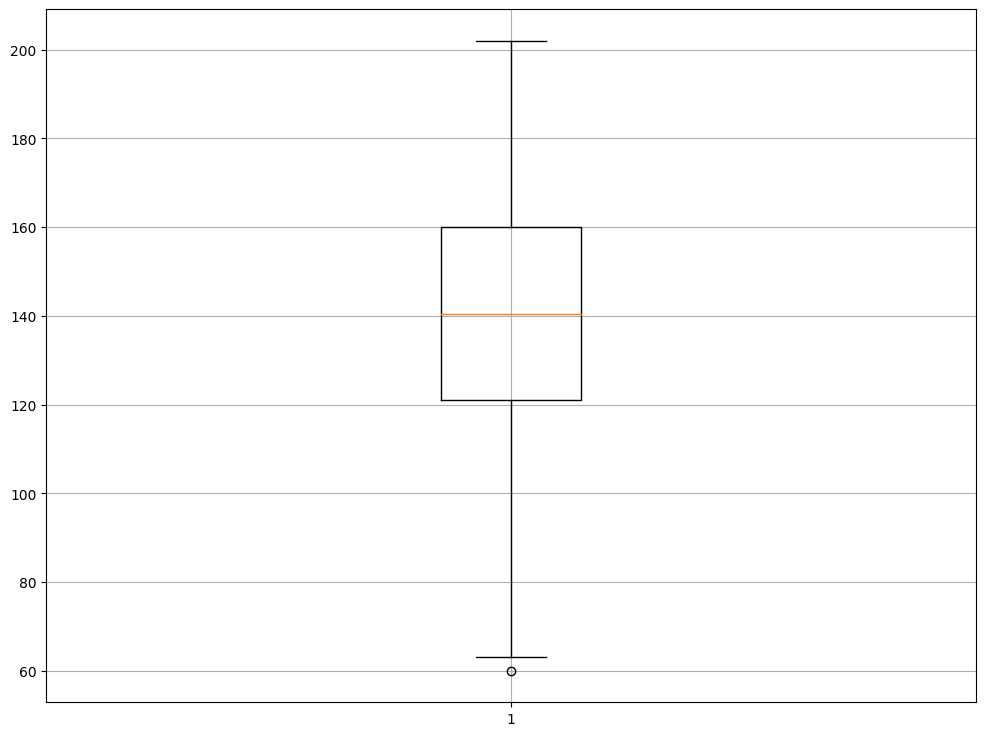

In [35]:
plt.rcParams['figure.figsize']=(12.0,9.0)
x1=df.iloc[:]['max heart rate'].values
plt.boxplot(x1)
plt.grid()
plt.show()

In [36]:
percentile25 = df['max heart rate'].quantile(0.25)
percentile75 = df['max heart rate'].quantile(0.75)

In [37]:
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("The upper limit is",upper_limit)
print("The lower limit is",lower_limit)

The upper limit is 218.5
The lower limit is 62.5


In [38]:
a=df[df['max heart rate'] > upper_limit]
b=df[df['max heart rate'] < lower_limit]
print(a)

Empty DataFrame
Columns: [age, sex, chest pain type, resting bp s, cholesterol, fasting blood sugar, resting ecg, max heart rate, exercise angina, oldpeak, ST slope, target]
Index: []


In [39]:
new_df = df.copy()
new_df['max heart rate'] = np.where(
    new_df['max heart rate'] > upper_limit,
    upper_limit,
    np.where(
        new_df['max heart rate'] < lower_limit,
        lower_limit,
        new_df['max heart rate'])
)

<ipython-input-40-603e6e1d7a6d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['max heart rate'])
<ipython-input-40-603e6e1d7a6d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['max heart rate'])


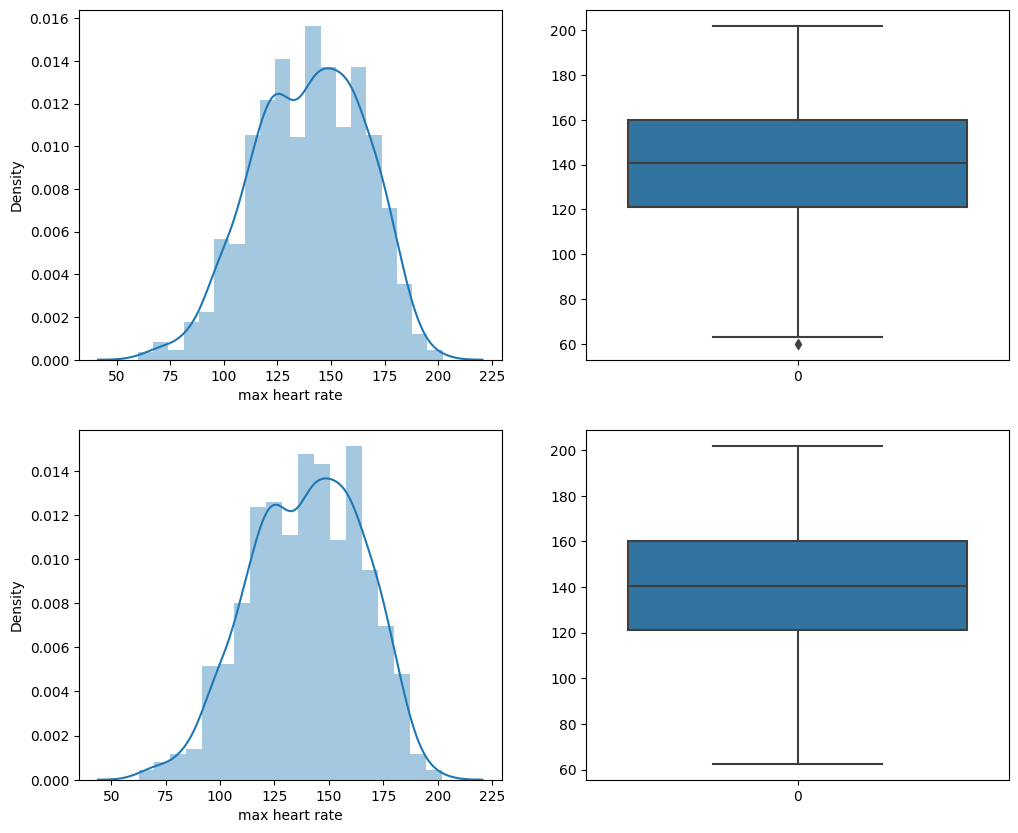

In [40]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.distplot(df['max heart rate'])
plt.subplot(2,2,2)
sns.boxplot(df['max heart rate'])
plt.subplot(2,2,3)
sns.distplot(new_df['max heart rate'])
plt.subplot(2,2,4)
sns.boxplot(new_df['max heart rate'])
plt.show()

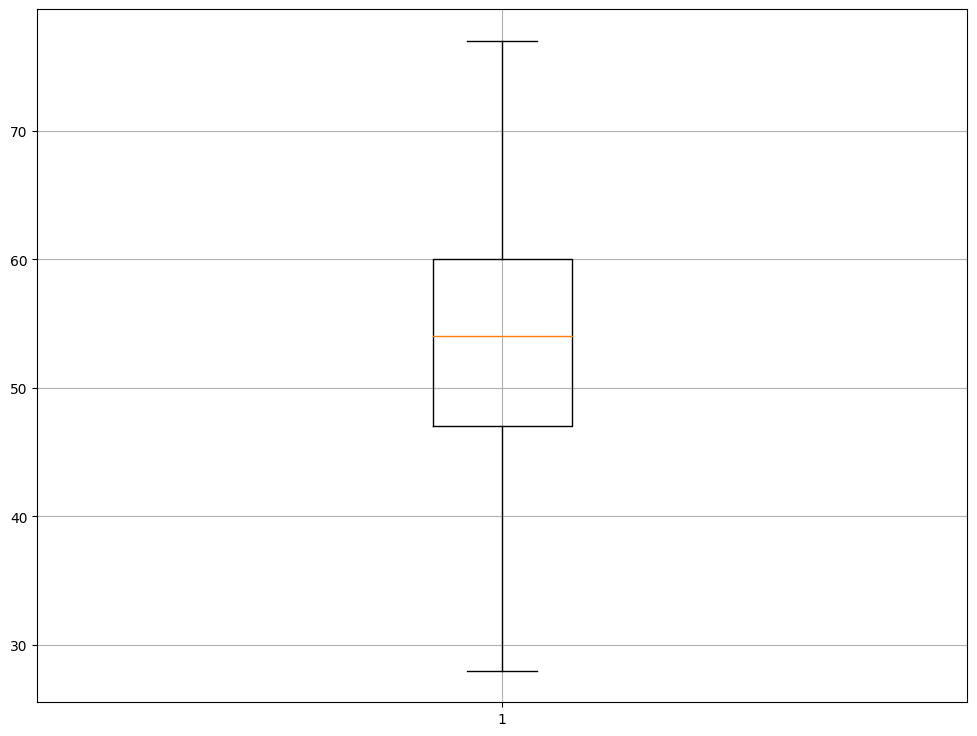

In [41]:
x2=df.iloc[:]['age'].values
plt.boxplot(x2)
plt.grid()
plt.show()

**VISUALIZATION**

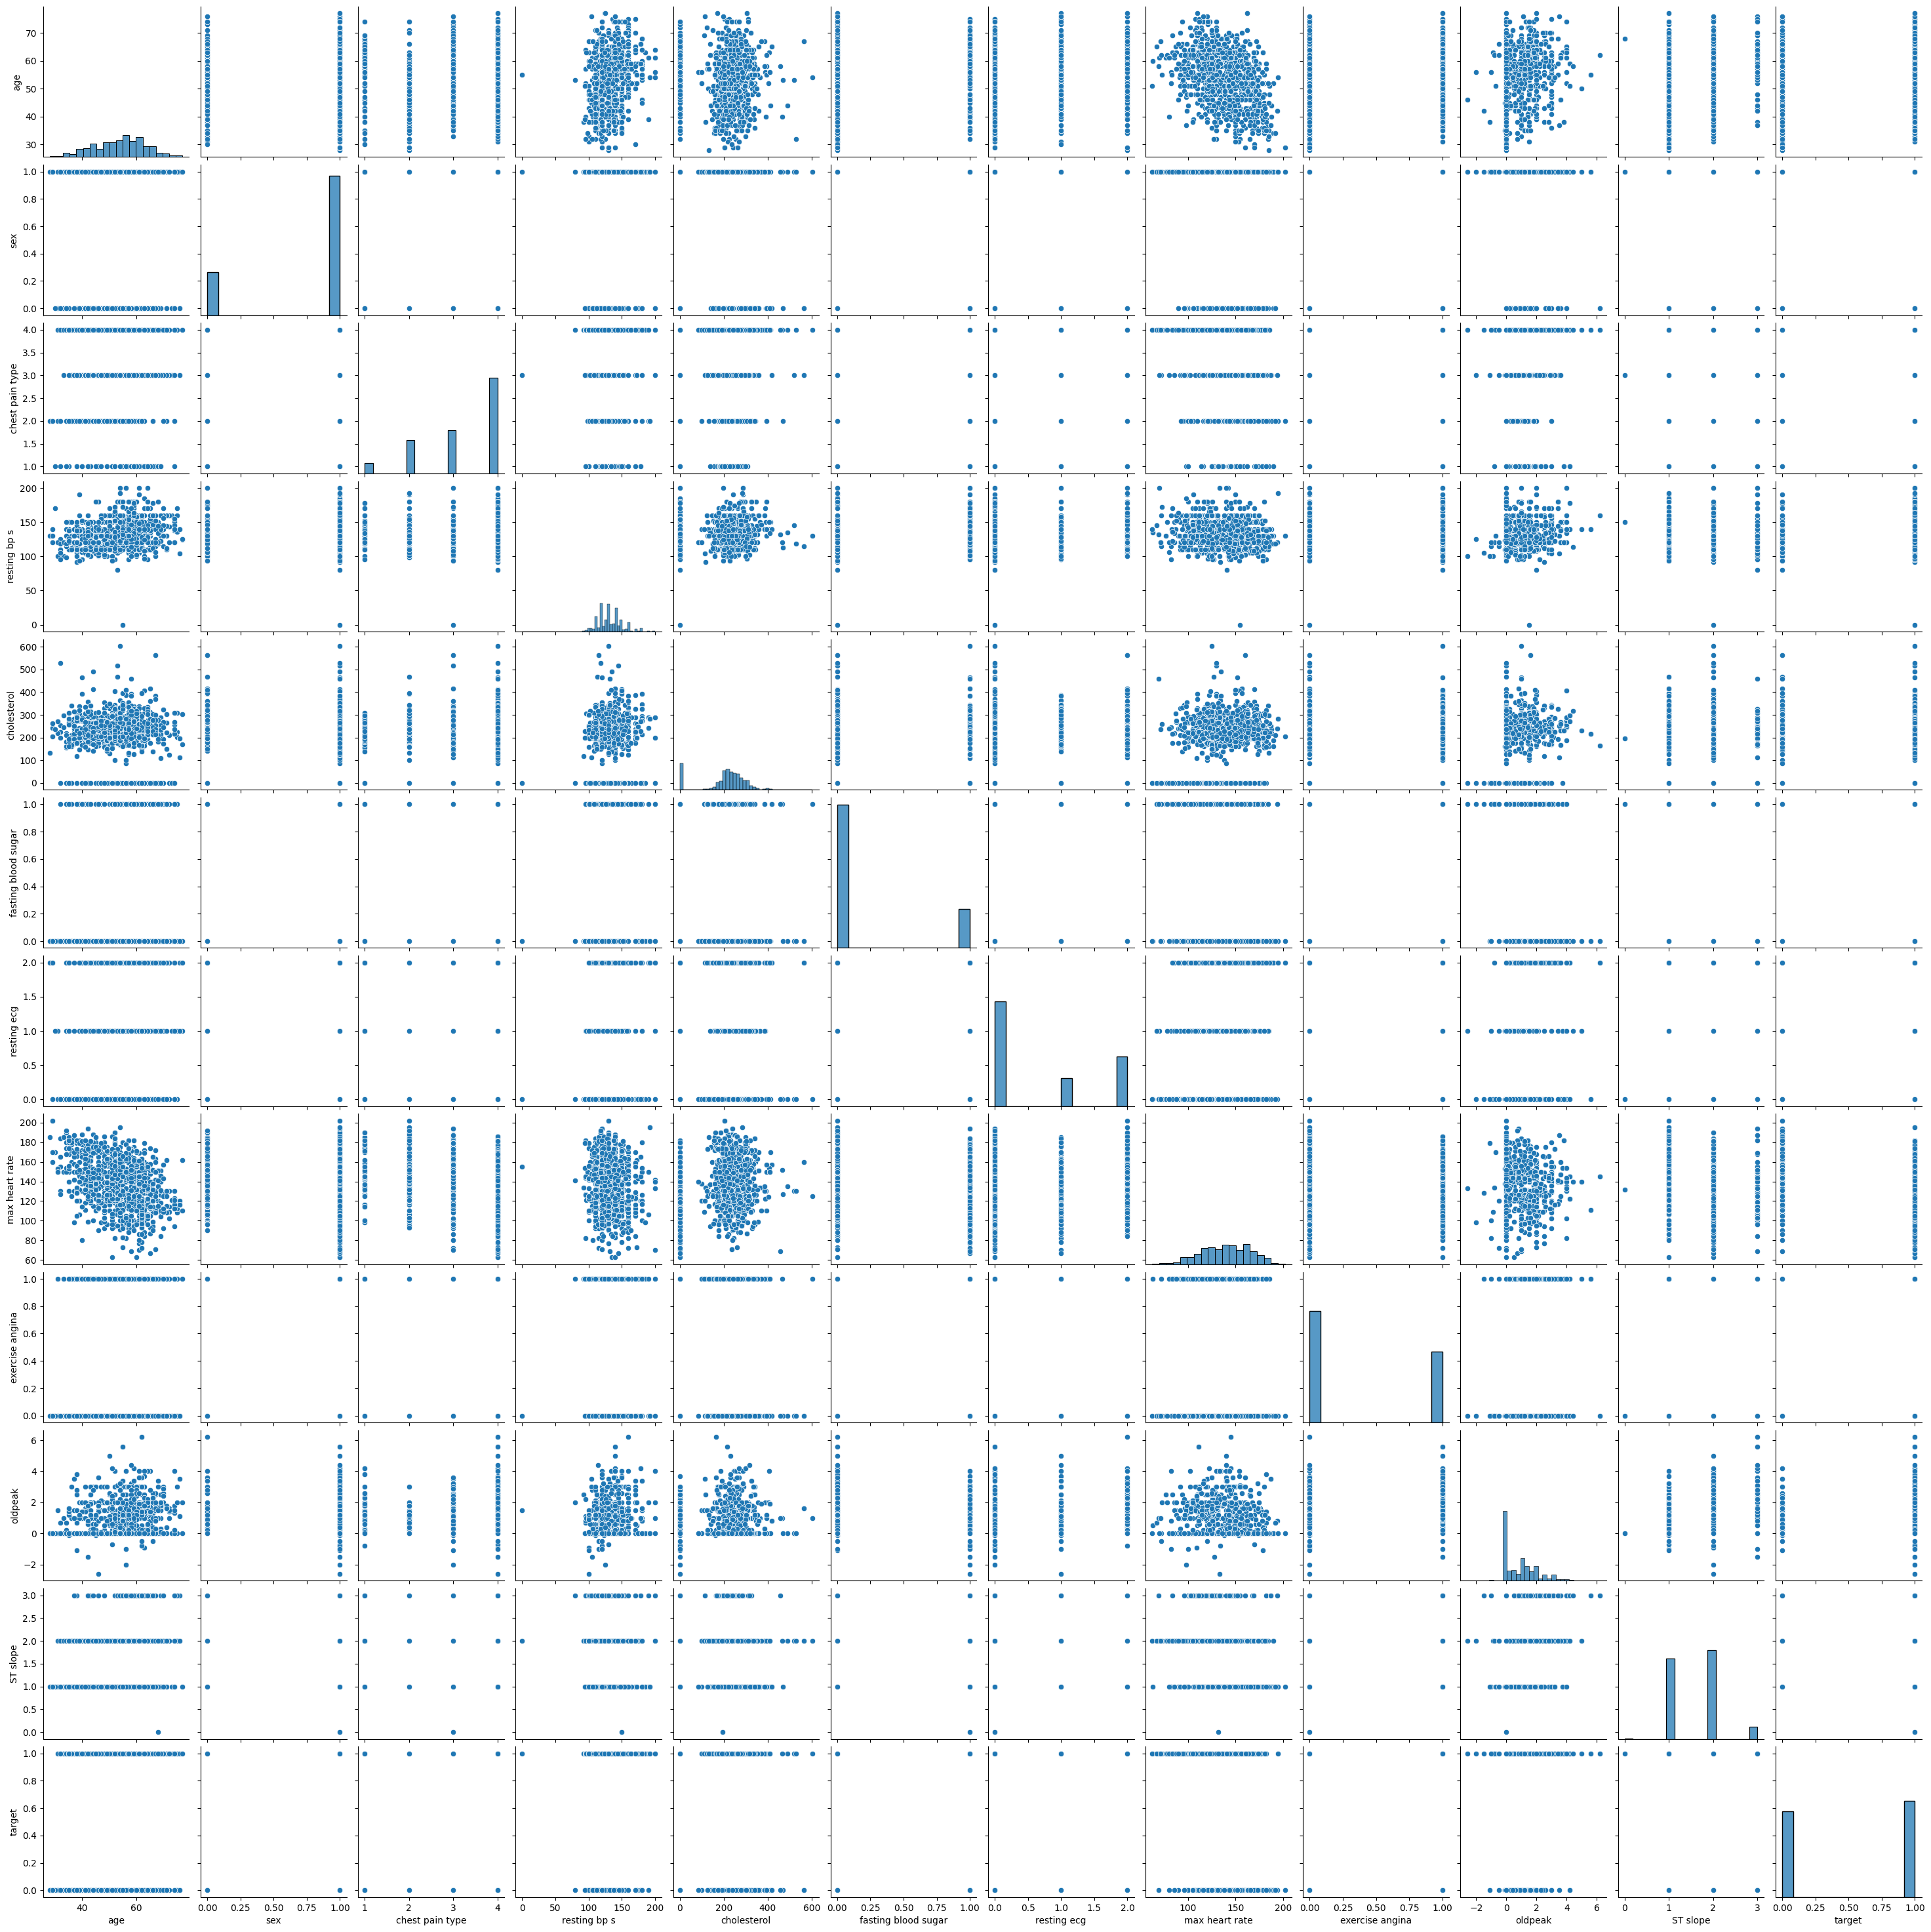

In [42]:
sns.pairplot(data=new_df)

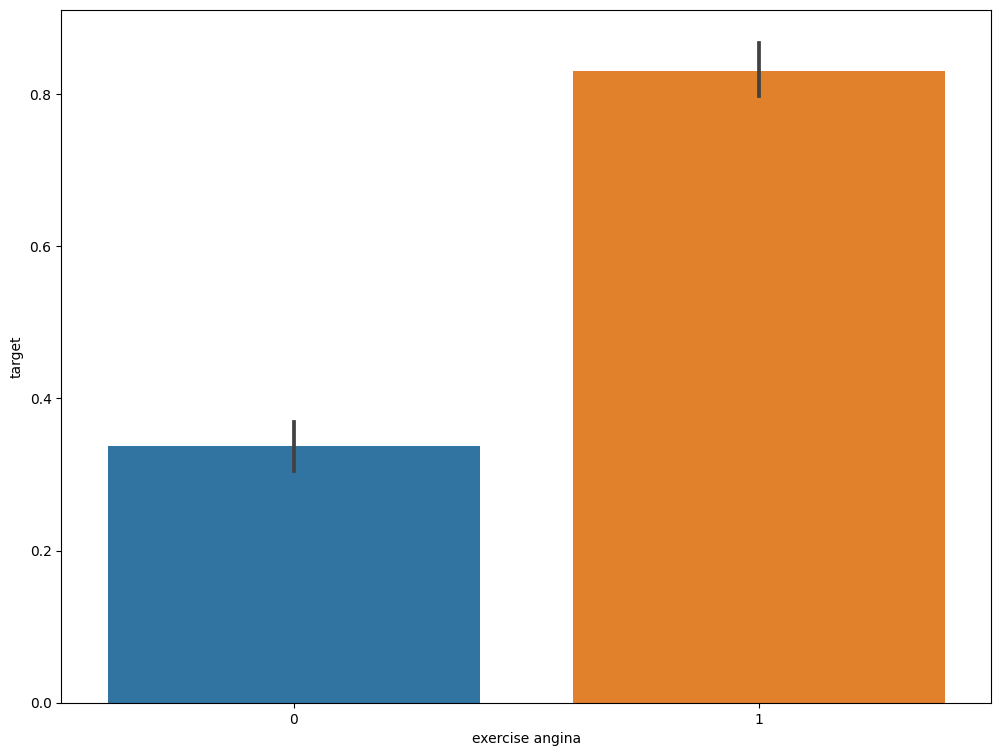

In [43]:
plt.rcParams['figure.figsize']=(12.0,9.0)
sns.barplot(x='exercise angina', y='target', data=new_df)
plt.show()

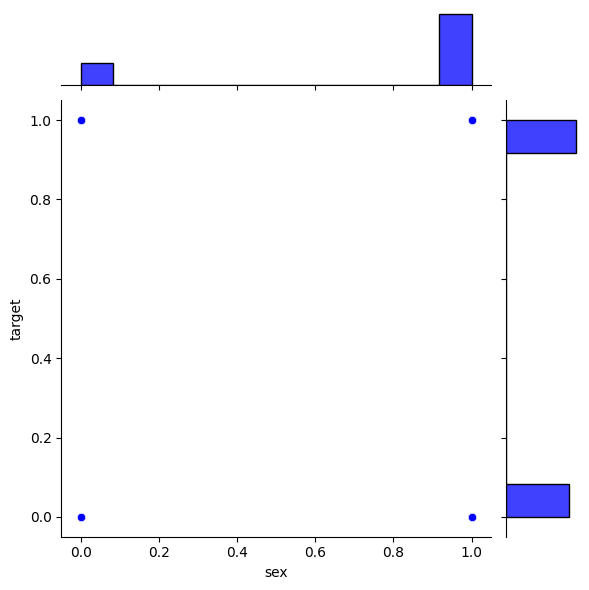

In [44]:
sns.jointplot(x='sex',y='target',color="blue",data=new_df)

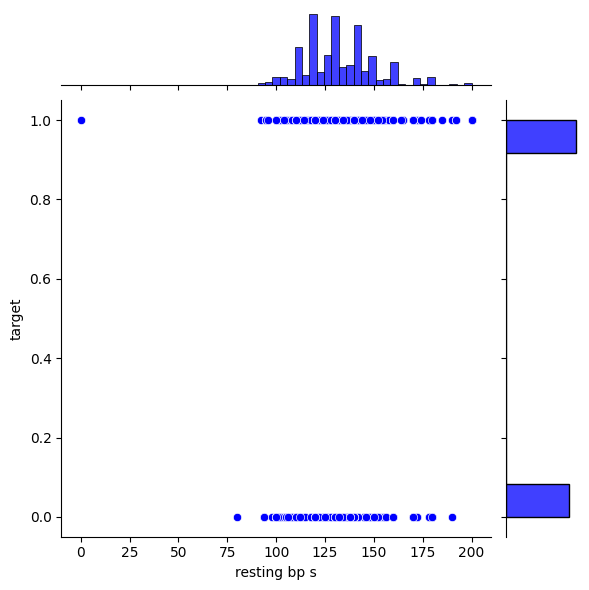

In [45]:
sns.jointplot(x='resting bp s',y='target',color="blue",data=new_df)

In [46]:
X=df.iloc[:,:-1]
X

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1
3,48,0,4,138,214,0,0,108,1,1.5,2
4,54,1,3,150,195,0,0,122,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2
1186,68,1,4,144,193,1,0,141,0,3.4,2
1187,57,1,4,130,131,0,0,115,1,1.2,2
1188,57,0,2,130,236,0,2,174,0,0.0,2


In [47]:
y=df.iloc[:,-1]
y

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64

In [48]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
from imblearn.over_sampling import RandomOverSampler

In [50]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [51]:
X_over, y_over = oversample.fit_resample(X, y)

In [52]:
new_df=pd.concat((X_over,y_over),axis=1)
new_df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1253,59,1,3,150,212,1,0,157,0,1.6,1,0
1254,48,0,4,150,227,0,0,130,1,1.0,2,0
1255,59,1,4,140,169,0,0,140,0,0.0,1,0
1256,58,1,2,130,230,0,0,150,0,0.0,1,0


In [53]:
new_df.groupby('target').target.count()

target
0    629
1    629
Name: target, dtype: int64

In [54]:
df.isnull().sum().sum()

0

<Axes: >

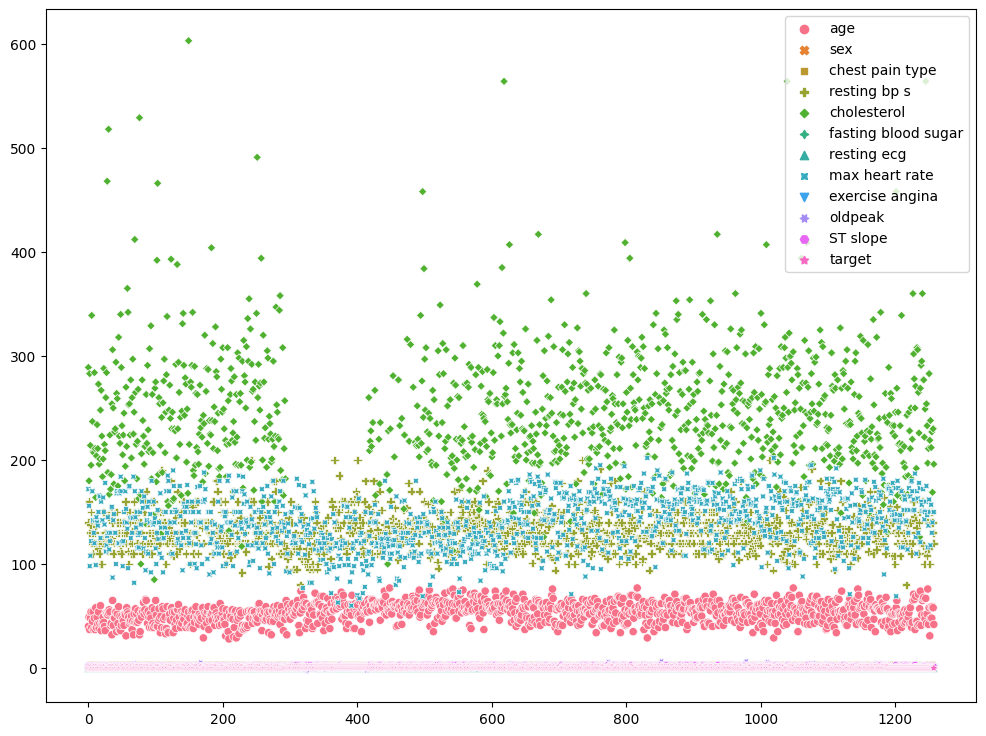

In [55]:
sns.scatterplot(data=new_df)

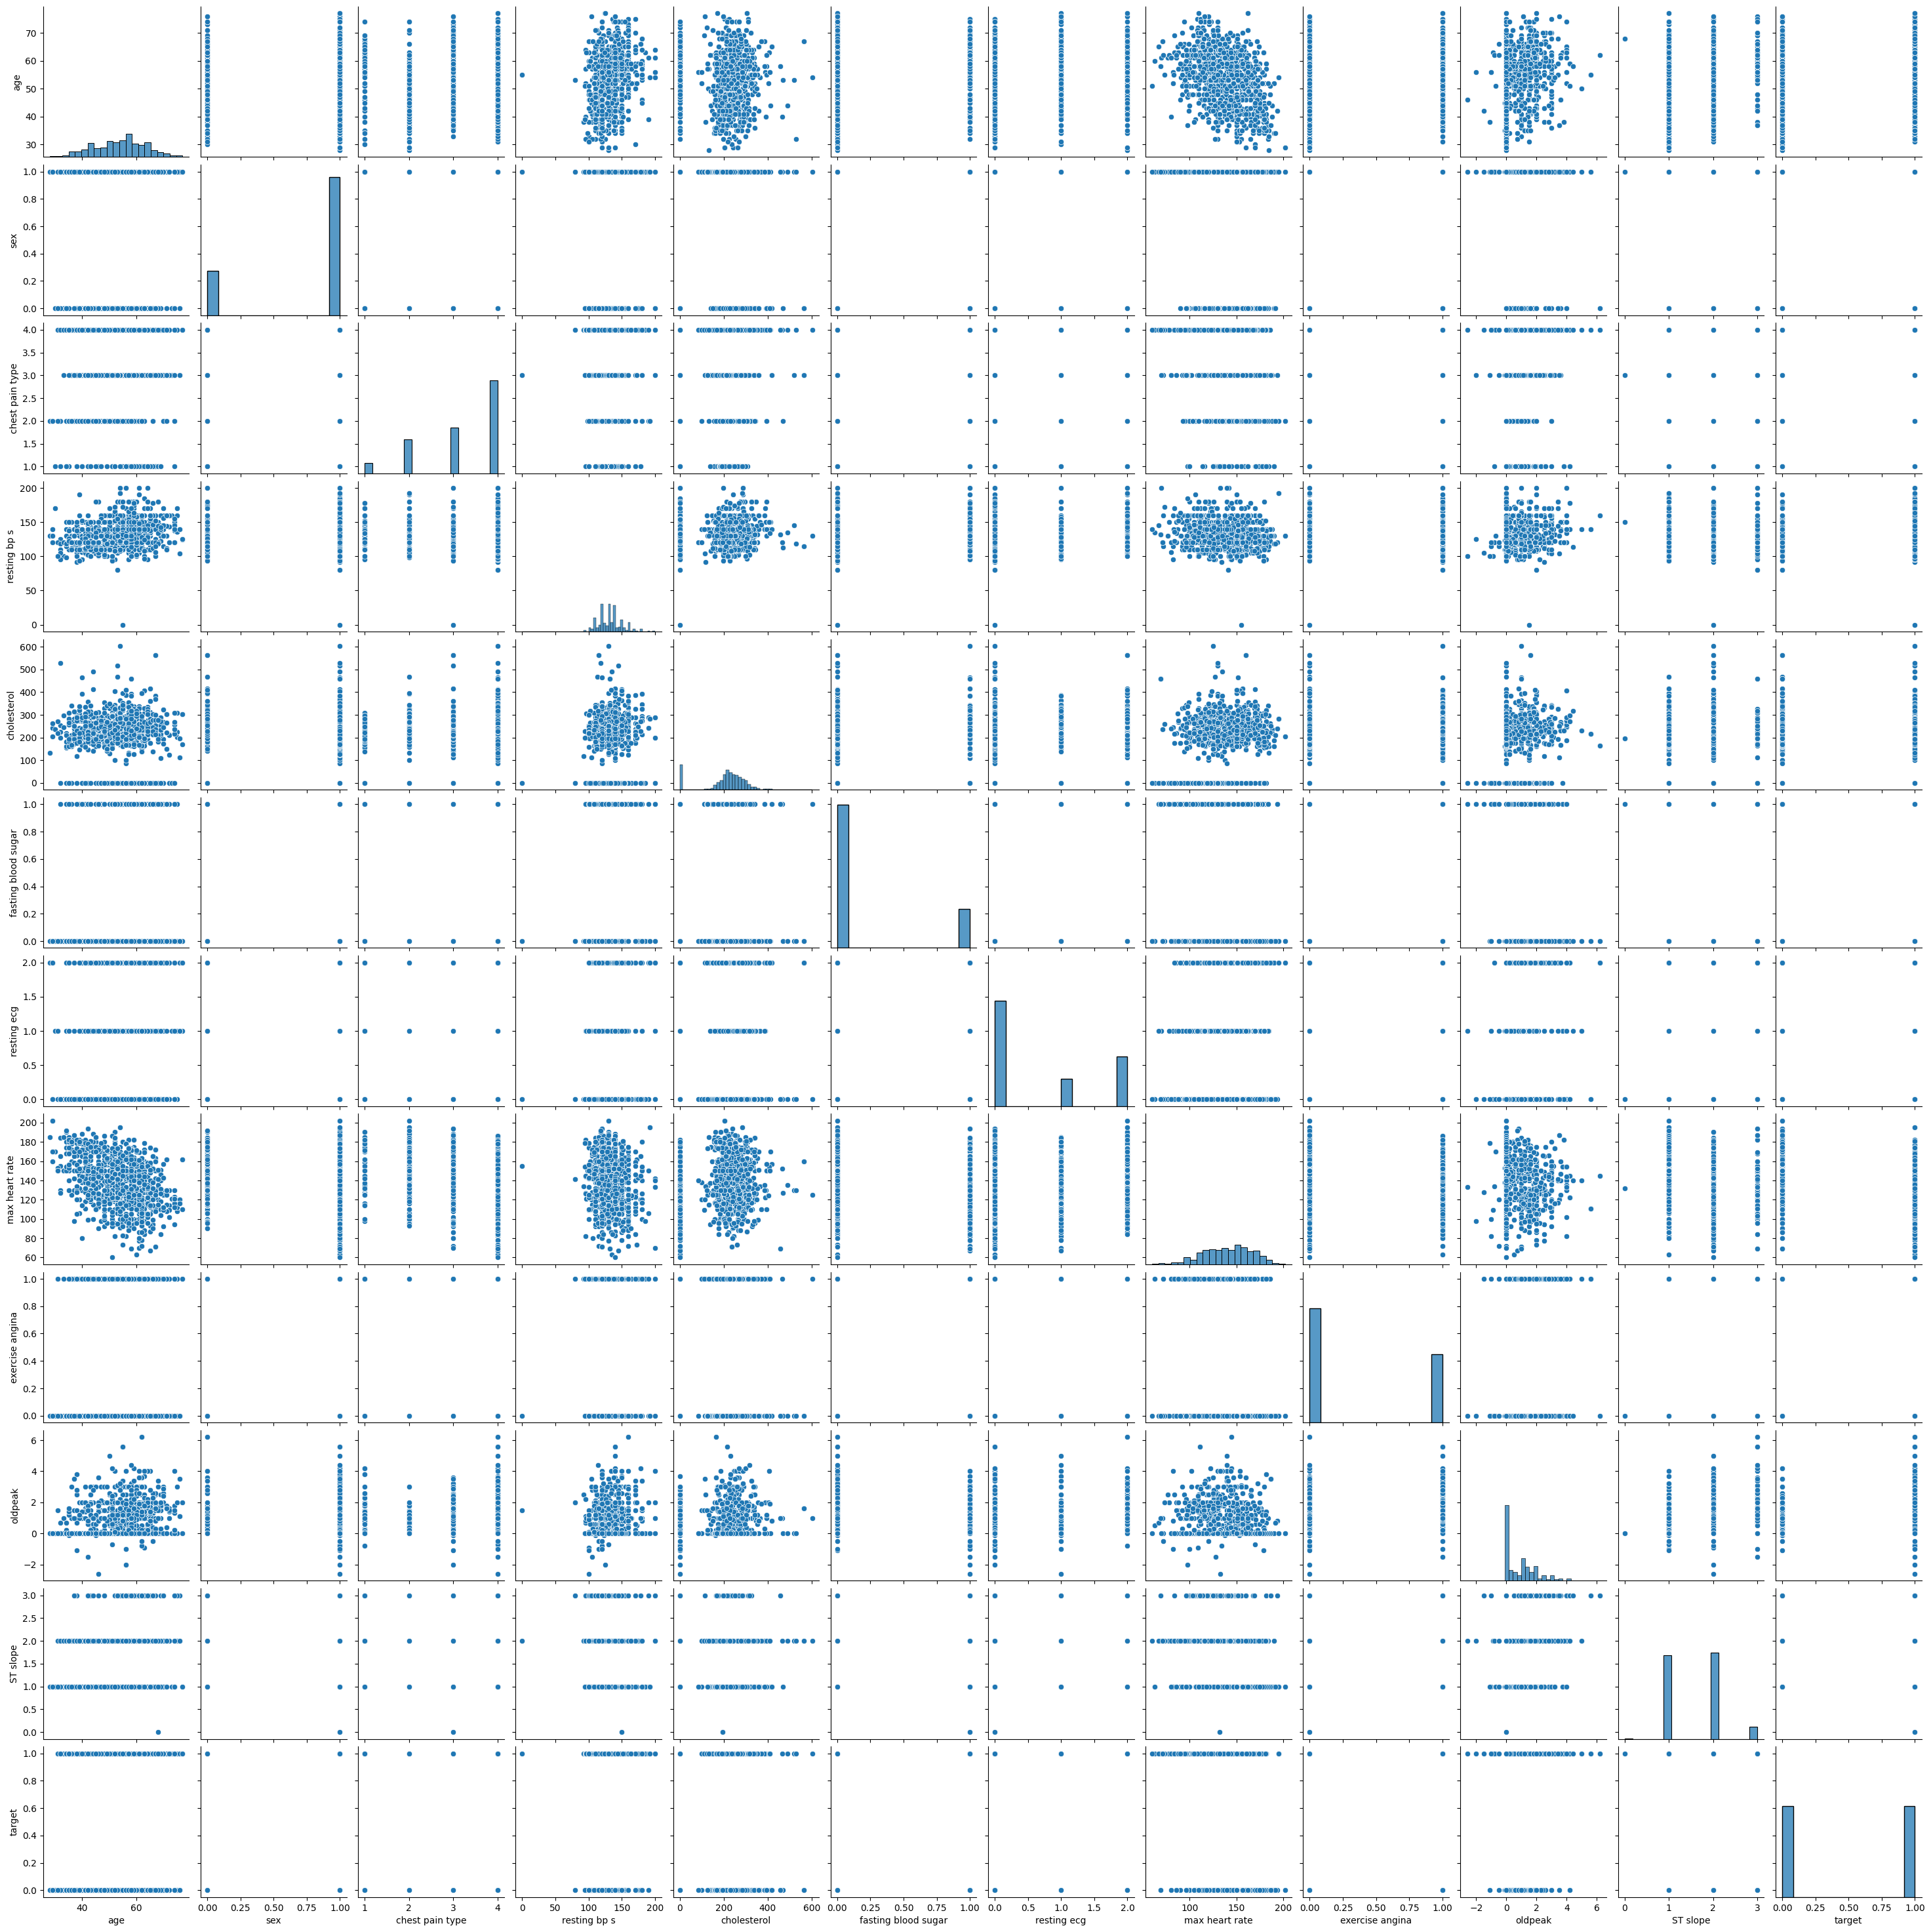

In [56]:
sns.pairplot(data=new_df)

In [57]:
one_hot_encoder = OneHotEncoder()

df_temp = one_hot_encoder.fit_transform(new_df[['age', 'sex', 'chest pain type', 'resting bp s', 'max heart rate']]).toarray()


encodings = pd.DataFrame(columns = one_hot_encoder.get_feature_names_out(),data = df_temp)
encodings = encodings.astype(int)
new_df = pd.concat([new_df,encodings] , axis=1)


new_df.drop(['age', 'sex', 'chest pain type', 'resting bp s', 'max heart rate'],axis = 1, inplace=True)
new_df.head()

,cholesterol,fasting blood sugar,resting ecg,exercise angina,oldpeak,ST slope,target,age_28,age_29,age_30,...,max heart rate_184,max heart rate_185,max heart rate_186,max heart rate_187,max heart rate_188,max heart rate_190,max heart rate_192,max heart rate_194,max heart rate_195,max heart rate_202
0,289,0,0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,180,0,0,0,1.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,283,0,1,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,214,0,0,1,1.5,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,195,0,0,0,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
new_df.dtypes

cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
exercise angina          int64
oldpeak                float64
                        ...   
max heart rate_190       int64
max heart rate_192       int64
max heart rate_194       int64
max heart rate_195       int64
max heart rate_202       int64
Length: 249, dtype: object

In [59]:
##cnn

In [60]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [63]:
# Load the CSV dataset
dataset = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

In [64]:
# Extract features (X) and labels (y)
features = dataset[['resting bp s', 'max heart rate', 'cholesterol', 'sex', 'age']].values
labels = dataset['target'].values

In [65]:
# Normalize the features between 0 and 1
features = (features - features.min(axis=0)) / (features.max(axis=0) - features.min(axis=0))

In [66]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [67]:
# Reshape the data to add a channel dimension (assuming you have one feature per input)
train_data = np.expand_dims(train_data, axis=-1)
test_data = np.expand_dims(test_data, axis=-1)

In [68]:
# Define the model architecture
input_shape = (5, 1)
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [69]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [70]:
# Train the model
model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))


Epoch 1/10
30/30 [==============================] - 2s 11ms/step - loss: 0.6805 - accuracy: 0.5609 - val_loss: 0.6649 - val_accuracy: 0.6597
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.6608 - accuracy: 0.6712 - val_loss: 0.6403 - val_accuracy: 0.6639
Epoch 3/10
30/30 [==============================] - 0s 3ms/step - loss: 0.6394 - accuracy: 0.6765 - val_loss: 0.6187 - val_accuracy: 0.6891
Epoch 4/10
30/30 [==============================] - 0s 3ms/step - loss: 0.6199 - accuracy: 0.6723 - val_loss: 0.6027 - val_accuracy: 0.7185
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.6033 - accuracy: 0.7080 - val_loss: 0.5791 - val_accuracy: 0.7269
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.6985 - val_loss: 0.5689 - val_accuracy: 0.7395
Epoch 7/10
30/30 [==============================] - 0s 4ms/step - loss: 0.5836 - accuracy: 0.7027 - val_loss: 0.5609 - val_accuracy: 0.7353
Epoch 8/10
30/30 [=

In [71]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


8/8 [==============================] - 0s 2ms/step - loss: 0.5526 - accuracy: 0.7353
Test Loss: 0.5525835156440735
Test Accuracy: 0.7352941036224365


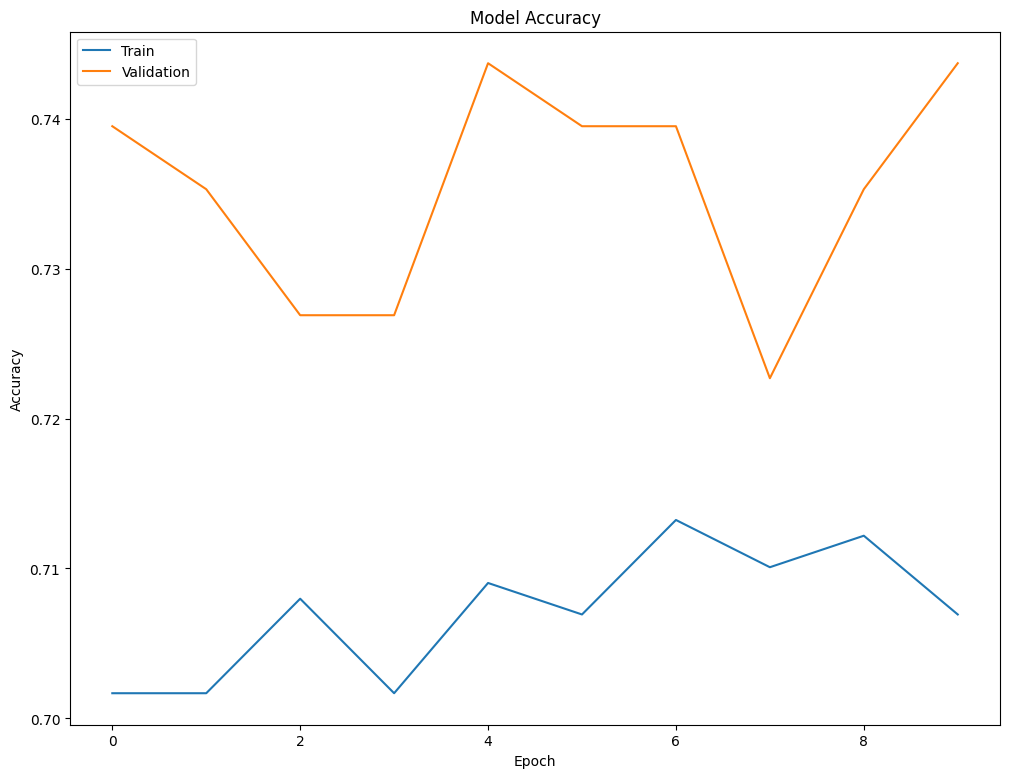

In [73]:
# Plot accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


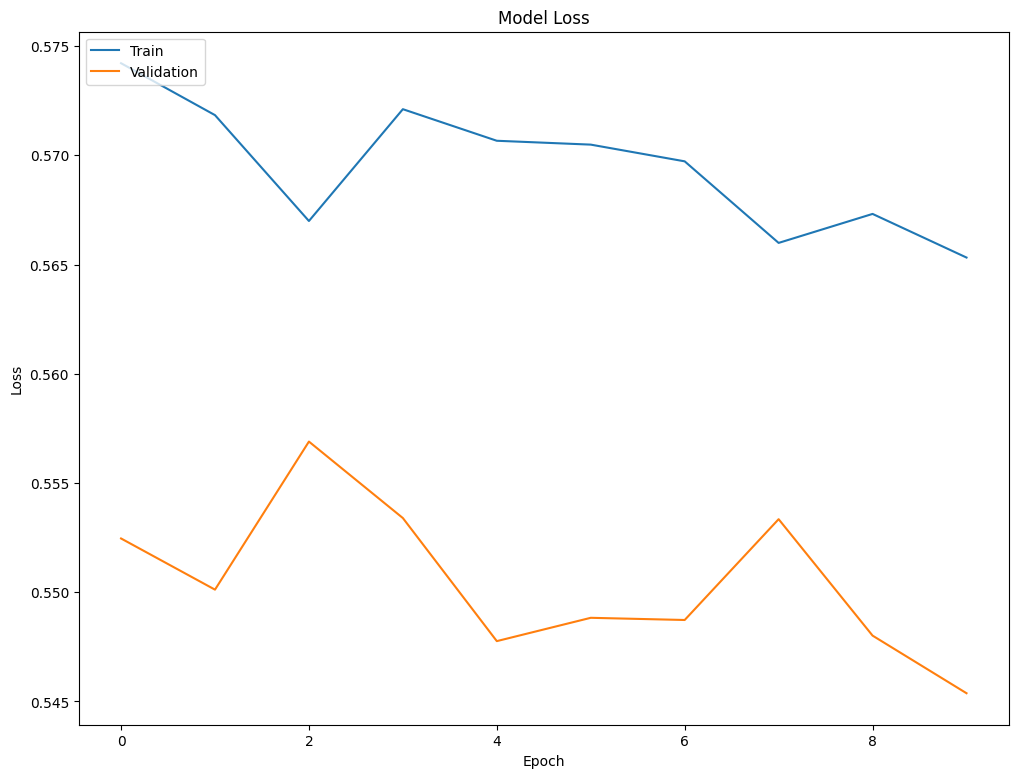

In [74]:
# Plot loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# **GUI**

In [127]:
def Purchased(Age,sex,resting_bp_s,cholestrol,max_heart_rate):
#turning the arguments into a numpy array
  x = np.array([Age,sex,resting_bp_s,cholestrol,max_heart_rate])
  prediction = model.predict(x.reshape(1, -1))
  return prediction

In [ ]:
!pip install gradio
import gradio as gr

In [116]:
X_train

,age,sex,resting bp s,cholesterol,max heart rate
1005,63,1,130,330,132
224,33,1,120,298,185
798,56,0,134,409,150
816,77,1,125,304,162
427,56,1,126,166,140
...,...,...,...,...,...
1044,58,1,125,300,171
1095,55,1,130,262,155
1130,61,1,134,234,145
860,62,0,140,268,160


In [120]:
df.iloc[798]

age                     56.0
sex                      0.0
chest pain type          4.0
resting bp s           134.0
cholesterol            409.0
fasting blood sugar      0.0
resting ecg              2.0
max heart rate         150.0
exercise angina          1.0
oldpeak                  1.9
ST slope                 2.0
target                   1.0
Name: 798, dtype: float64

In [128]:
outputs = gr.outputs.Textbox()
app = gr.Interface(fn=Purchased, inputs=['number','number','number','number','number'], outputs=outputs, description="HEART STROKE PREDICTION", css=css)

# Launch the interface
app.launch(share=True)


/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://12de609cdd1b94b913.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## **BASE MODELS**

In [82]:
import yfinance as yf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the yfinance dataset
data = df

# Step 2: Preprocess the data
#data['Target'] = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)
#data.dropna(inplace=True)

# Step 3: Splitting the Data
X = data[['age', 'sex', 'resting bp s', 'cholesterol', 'max heart rate']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **LOGISTIC REGRESSION**

In [83]:
# Logistic Regression
# Step 4: Implementing Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)

# Step 10: Evaluating Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print('Accuracy - Logistic Regression:', accuracy_logreg)


Accuracy - Logistic Regression: 0.7184873949579832


## **RANDOM FOREST**

In [84]:
# Random Forest
# Step 6: Implementing Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Step 10: Evaluating Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Accuracy - Random Forest:', accuracy_rf)

Accuracy - Random Forest: 0.865546218487395


## **SVM MODEL**

In [85]:
# SVM
# Step 5: Implementing SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Step 10: Evaluating SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print('Accuracy - SVM:', accuracy_svm)

Accuracy - SVM: 0.7310924369747899


## **K-MEANS MODEL**

In [86]:
# K-means Clustering
# Step 7: Implementing K-means Clustering
kmeans_model = KMeans(n_clusters=2)
kmeans_model.fit(X_train)
y_pred_kmeans = kmeans_model.predict(X_test)

# Step 10: Evaluating K-means Clustering
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
print('Accuracy - K-means Clustering:', accuracy_kmeans)

Accuracy - K-means Clustering: 0.5756302521008403


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## **K NEAREST NEIGHBOUR MODEL**

In [87]:
# K-nearest Neighbors (KNN)
# Step 9: Implementing K-nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Step 10: Evaluating K-nearest Neighbors (KNN)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy - K-nearest Neighbors (KNN):', accuracy_knn)


Accuracy - K-nearest Neighbors (KNN): 0.7100840336134454


# **DECISION TREE MODEL**

In [88]:
# Decision Tree
# Step 8: Implementing Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Step 10: Evaluating Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print('Accuracy - Decision Tree:', accuracy_dt)

Accuracy - Decision Tree: 0.8235294117647058


## **rubrics 2: IMBALANCE DATA**

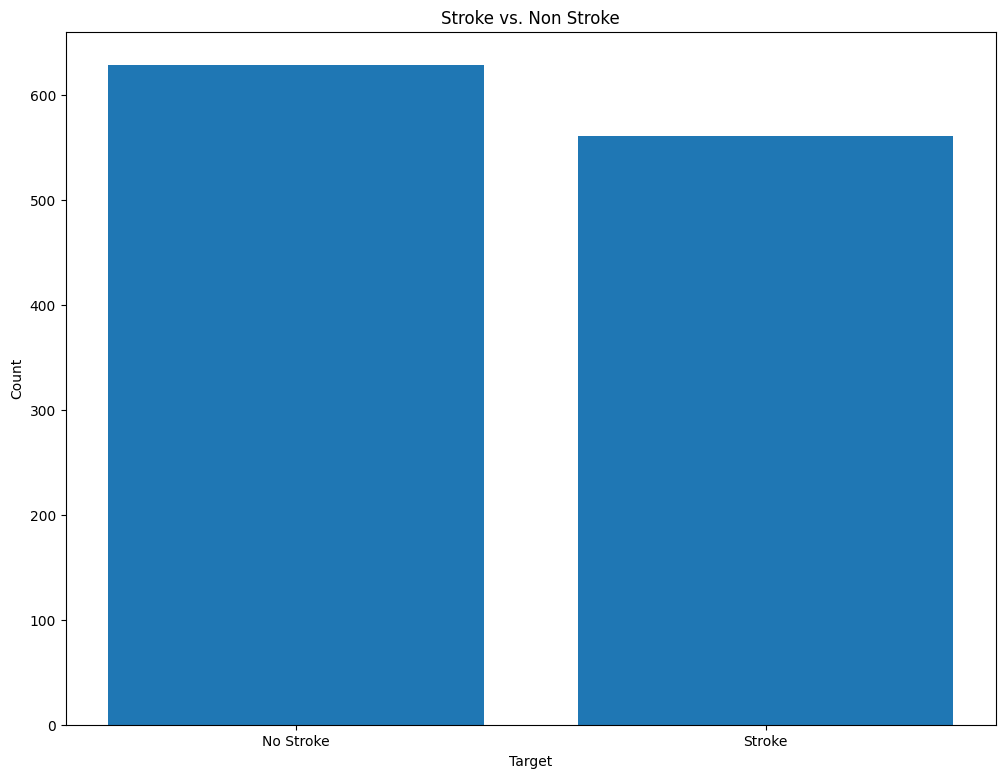

In [90]:
# Disasters vs non disasters tweets frequency barplot
target_counts = df['target'].value_counts()
plt.bar(['No Stroke', 'Stroke'], target_counts.values)
plt.title('Stroke vs. Non Stroke')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

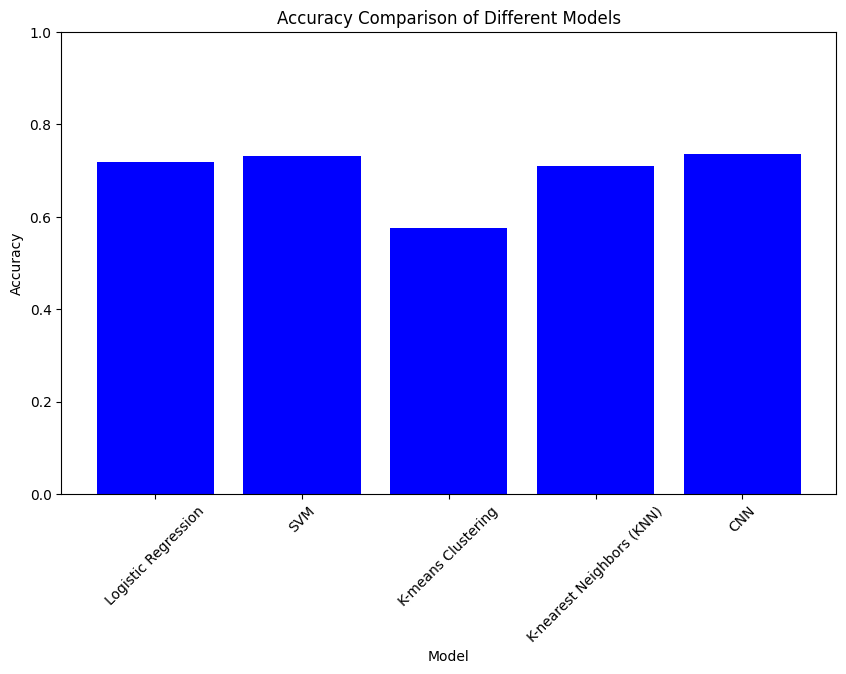

In [131]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
model_names = ['Logistic Regression',  'SVM', 'K-means Clustering', 'K-nearest Neighbors (KNN)','CNN']
accuracies = [accuracy_logreg, accuracy_svm, accuracy_kmeans, accuracy_knn, test_accuracy]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set the y-axis limits
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()


In [ ]:
import gradio as gr

# Define the models available in Gradio
models_available = ['Logistic Regression', 'CNN', 'K-Means Clustering', 'K-nearest Neighbors', 'SVM']

def Purchased(text, md):
    if md == 'Logistic Regression':
        pred = logreg_model.predict(vectorizer.transform([text]))
    elif md == 'CNN':
        sequence = tokenizer.texts_to_sequences([text])
        padded_sequence = pad_sequences(sequence, padding="post", truncating="post", maxlen=50)
        pred = model.predict(padded_sequence)
        pred = int(pred[0][0] > 0.5)
    elif md == 'K-Means Clustering':
        pred = nb_model.predict(vectorizer.transform([text]))
    elif md == 'K-nearest Neighbors':
        pred = rf_model.predict(vectorizer.transform([text]))
    elif md == 'SVM':
        pred = svm_model.predict(vectorizer.transform([text]))
    else:
        raise ValueError("Invalid model specified.")

    return pred

In [ ]:
# Create a list of dictionaries containing the model choices
model_choices = [model for model in models_available]

# Create the Gradio interface with the model choices
inputs = ['text', gr.inputs.Dropdown(choices=model_choices)]
outputs = gr.outputs.Textbox()
app = gr.Interface(fn=Purchased, inputs=inputs, outputs=outputs, description="This is Predicting Disaster")
app.launch(share=True)

In [136]:
import gradio as gr

# Define the models available in Gradio
models_available = {
    'Logistic Regression': logreg_model,
    'CNN': model,
    'K-Means Clustering': kmeans_model,
    'K-nearest Neighbors': knn_model,
    'SVM': svm_model
}

def Purchased(age, sex, resting_bp_s, cholesterol, max_heart_rate, md):
    selected_model = models_available[md]

    if selected_model == logreg_model:
        # Perform prediction logic using logistic regression model
        # Replace this with your own prediction code
        input_data = [[age, sex, resting_bp_s, cholesterol, max_heart_rate]]
        pred = logreg_model.predict(input_data)
    elif selected_model == model:
        # Perform prediction logic using CNN model
        # Replace this with your own prediction code
        input_data = [[age, sex, resting_bp_s, cholesterol, max_heart_rate]]  # Modify input data according to your CNN model's input requirements
        pred = model.predict(input_data)
        pred = int(pred[0] > 0.5)
    elif selected_model == kmeans_model:
        # Perform prediction logic using K-Means Clustering model
        # Replace this with your own prediction code
        input_data = [[age, sex, resting_bp_s, cholesterol, max_heart_rate]]
        pred = kmeans_model.predict(input_data)
    elif selected_model == knn_model:
        # Perform prediction logic using K-nearest Neighbors model
        # Replace this with your own prediction code
        input_data = [[age, sex, resting_bp_s, cholesterol, max_heart_rate]]
        pred = knn_model.predict(input_data)
    elif selected_model == svm_model:
        # Perform prediction logic using SVM model
        # Replace this with your own prediction code
        input_data = [[age, sex, resting_bp_s, cholesterol, max_heart_rate]]
        pred = svm_model.predict(input_data)
    else:
        raise ValueError("Invalid model specified.")

    return pred


# Define the input and output interfaces
inputs = [
    gr.inputs.Number(label="Age"),
    gr.inputs.Number(label="Sex (0 for female, 1 for male)"),
    gr.inputs.Number(label="Resting Blood Pressure"),
    gr.inputs.Number(label="Cholesterol"),
    gr.inputs.Number(label="Maximum Heart Rate"),
    gr.inputs.Dropdown(models_available.keys(), label="Model")
]
outputs = gr.outputs.Textbox()

# Configure the Gradio interface
interface = gr.Interface(fn=Purchased, inputs=inputs, outputs=outputs,
                        title="Heart Stroke Prediction",
                        description="Enter the details to predict the risk of heart stroke",
                        examples=[['45', '1', '140', '230', '150', 'Logistic Regression']],
                        allow_flagging=False)

# Launch the Gradio interface
interface.launch()


/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:62: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:219: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:222: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.component

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>